## Laboratorio desarrollado por Angela Cristina Villate Moreno
## Entregado a la Dra. Ximena Patricia Blanco Valencia



_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
#Cargue de librerías necesarias para el desarrollo de la actividad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import datasets, linear_model
from numpy import *

In [2]:
## cargar el dataset

In [3]:
# Leer el archivo CSV con punto y coma como delimitador
AirData = pd.read_csv('AirQualityUCI.csv', sep=';') ### insertamos el separador (;) para una mejor visualización de los datos
AirData.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
## ¿cuántas instancias tiene el dataset?

<span style="color:blue; font-size:14pt; font-weight:bold;">Análisis de datos para perfilar la variable dependiente.</span>

Al realizar el cargue y análisis de los datos se encontró que existen 9471 filas o anotaciones con datos por cada una de las variables, tal y como se mostrará más adelante existen 114 filas nulas, por lo que en total, el conjunto de datos está conformado por 9358 instancias o **9357 (en la contabilidad de Python)**. 

Realizaremos una descripción de cada una de las variables, para así ir determinando cuál será la variable respuesta o varibale dependiente para realizar el modelo y responder a la pregunta sobre la calidad del aire en la ciudad italaina:

Date: fecha en la que se capturó la información. **Debido a que se debe hacer un análisis por día, se avizora la necesidad de computar los datos por día y promediar los valores**

Time: hora en la que se recolectó la información. Se presentan por secuencia de horas

CO(GT): Concentración de de monóxido de carbono por hora en miligramos por metro cúbico

PT08.S1(CO): respuesta del sensor a la presencia e monóxido de carbono, es una variable categórica. 

NMHC (GT): concentración de hidrocarburos no metánicos por hora en el aire. Los valores se dan en microgramos por metro cúbico

C6H6(GT): es una variable continua, indica la concentración por hora de benceno en el aire. La concentración se mide en microgramos por metro cúbico

PT08S.S2(NMHC) ( es una variable categórica. Respuesta del sensor para que identifique hidrocarburos no metánicos. En esta varible se acumulan las clases del sensor.

NOx(GT): es una variable numérica que indica la concentración de óxidos de nitrógeno por hora en el aire, las unidades se presentan en partes por billón.

PT08.S3 (NOx): datos recopilados por el sensor y promediados sobre óxidos de nitrógeno

NO2(GT):variable que recibe las concentraciones de dióxido de carbono por hora en microgramos por metro cúbico

PT08.S4 (NOX: es una variable categórica y acumula los datos recopilados del sensor en cuanto a la detección de dióxido de nitrógeno

PT08.S5(O3): es una variable categórica y acumula los datos recopilados del sensor acerca de la detección de ozono en el aire 

T: indica la temperatura

RH: muestra la humedad relativa

AH: muestra la humedad absoluta







In [5]:
# Obtener una descripción estadística y de conteo para columnas numéricas
descripcion_estadistica = AirData.describe()


# Imprimir los resultados
print("Descripción estadística:")
print(descripcion_estadistica)



Descripción estadística:
       PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.000000  -200.000000     895.000000   141.000000    794.000000   
75%    1221.000000  -200.000000    1105.000000   284.000000    960.000000   
max    2040.000000  1189.000000    2214.000000  1479.000000   2683.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  Unnamed: 15  Unnamed: 16  
count  9357.000000   9357.000000  9357.000000          0.0          0.0  
mean     58.148873   1391.479641   975.072032          NaN          NaN  
std     126.940455    467.210125   456.938184          NaN 

## ¿cuál es el tipo de datos de cada una de las columnas?
#### para responder a este interrogante se invocó la función DataType para que identifique la naturaleza de cada una de las variables, así como las instancias

In [6]:
DataType = AirData.info()
print("\nData Type:")
print(DataType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB

Dat

In [7]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

In [8]:
# Filtrar las columnas numéricas
columnas_numericas = AirData.select_dtypes(include=['number']).columns

# Filtrar las columnas categóricas
columnas_categoricas = AirData.select_dtypes(include=['object']).columns

# Contar el número de variables numéricas y categóricas
num_variables_numericas = len(columnas_numericas)
num_variables_categoricas = len(columnas_categoricas)

# Imprimir los resultados
print(f"Número de variables numéricas: {num_variables_numericas}")
print(f"Número de variables categóricas: {num_variables_categoricas}")

Número de variables numéricas: 10
Número de variables categóricas: 7


In [9]:
## ¿existen valores nulos en el dataset?

In [10]:
# Calcular el número de valores nulos por columna
valores_nulos_por_columna = AirData.isnull().sum()

# Calcular el número total de valores nulos en todo el conjunto de datos
total_valores_nulos = valores_nulos_por_columna.sum()

# Imprimir los resultados
print("Número de valores nulos por columna:")
print(valores_nulos_por_columna)

print(f"\nNúmero total de valores nulos en el conjunto de datos: {total_valores_nulos}")

Número de valores nulos por columna:
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Número total de valores nulos en el conjunto de datos: 20652


In [11]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

💡 Para responder a este interrogante es necesario comprender el comportamiento de los datos por día. Recordemos que el objetivo de los modelos es analizar **la calidad del aire por día.** Por lo tanto, se requieren de, al menos, dos condiciones: la primera, la variable objetivo o la variable dependiente debe ser numérica (este es un requisito de los modelos de regresión), por lo tanto, todas las variables categóricas se descartan. El segundo requisito para tomar la decisión, nos exige conocer el comportamiento de los datos por día, razón por la cual se agruparon cada uno de los registros por día. Se hizo un cálculo de promedios de los valores.

Al leer los datos agrupados por días, se descartó la variable CO, es decir, de monóxido de carbono, debido al elevado número de elementos faltantes. Por tal razón, las variables que se tuvieron en cuenta fuero, NMHC, C6H6, NOX y NO2. 

Tras realizar un análisis explicatorio de los datos DEA,  <span style="color:blue; font-size:11pt; font-weight:bold;">se decidió tomar como variable respuesta NOX, es decir, oxidos de nitrógeno.</span> , es decir, oxidos de nitrógeno. Debido a que esta es la variable que presenta un comportamiento "normal" y que permitirá optimizar los modelos. 

A continuación se presentan los dos procesos a partir de los cuales se llegó a esta conclusión, es decir, agrupamiento de datos por días y visualización.


**a. Agrupamiento de datos por día**

In [20]:
import pandas as pd

# fue neccesario incluir esta línea en todo el código para que no generara errores en la transformación de los datos, por NA
AirData['Date'] = pd.to_datetime(AirData['Date'], errors='coerce')

# Convertir todas las columnas a tipo numérico, incluso las que contienen cadenas (str), de esta forma garantizamos que se pudiera calcular el promedi
AirData = AirData.apply(pd.to_numeric, errors='coerce')

# Verificar si hay valores nulos en las columnas numéricas antes de calcular el promedio diario
numeric_columns = AirData.select_dtypes(include='number').columns
null_columns = AirData[numeric_columns].isnull().any()

if null_columns.any():
    print("Las siguientes columnas numéricas contienen valores nulos:")
    print(null_columns[null_columns].index)
    # Puedes decidir cómo manejar los valores nulos, ya sea eliminándolos o imputándolos
    
# Asegurarse de que 'Date' esté en formato datetime después de la conversión numérica, fue necesaria esta línea en todo el código
AirData['Date'] = pd.to_datetime(AirData['Date'], errors='coerce')

# Crear un nuevo DataFrame agrupado por día y calcular el promedio
daily_average = AirData.groupby(AirData['Date'].dt.date).mean().reset_index()

# Verificar si hay valores nulos en las columnas numéricas después de la conversión
null_columns = daily_average.isnull().any()

if null_columns.any():
    print("Las siguientes columnas numéricas contienen valores nulos:")
    print(null_columns[null_columns].index)

    

print("\nPromedio diario:")
print(daily_average.head())

Las siguientes columnas numéricas contienen valores nulos:
Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')
Las siguientes columnas numéricas contienen valores nulos:
Index(['Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

Promedio diario:
         Date  Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0  2004-01-04   NaN     2.0  1063.833333  310.125000       NaN     859.125000   
1  2004-01-05   NaN   -38.0  1097.500000 -180.208333       NaN     913.708333   
2  2004-01-06   NaN  -200.0  1135.583333 -200.000000       NaN    1021.875000   
3  2004-01-07   NaN     2.0  1130.583333 -200.000000       NaN    1038.541667   
4  2004-01-08   NaN     2.0   974.166667 -200.000000       NaN     792.583333   

      NOx(GT)  PT08.S3(NOx)  

C:\Users\villa\AppData\Local\Temp\ipykernel_23512\2118434938.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_average = AirData.groupby(AirData['Date'].dt.date).mean().reset_index()


**En la siguiente línea se pueden visualizar los datos nulos por día y por mes**

### 💡este es el conteo de datos nulos tras el agrupamiento por días

In [21]:
# Contar valores nulos por columna en daily_average
null_counts_daily = daily_average.isnull().sum()

# Mostrar el número de valores nulos por columna en daily_average
print("Número de valores nulos por columna en daily_average:")
print(null_counts_daily)




Número de valores nulos por columna en daily_average:
Date               0
Time             391
CO(GT)            92
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)         391
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                359
RH               359
AH               359
Unnamed: 15      391
Unnamed: 16      391
dtype: int64


Columnas disponibles en daily_average:
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


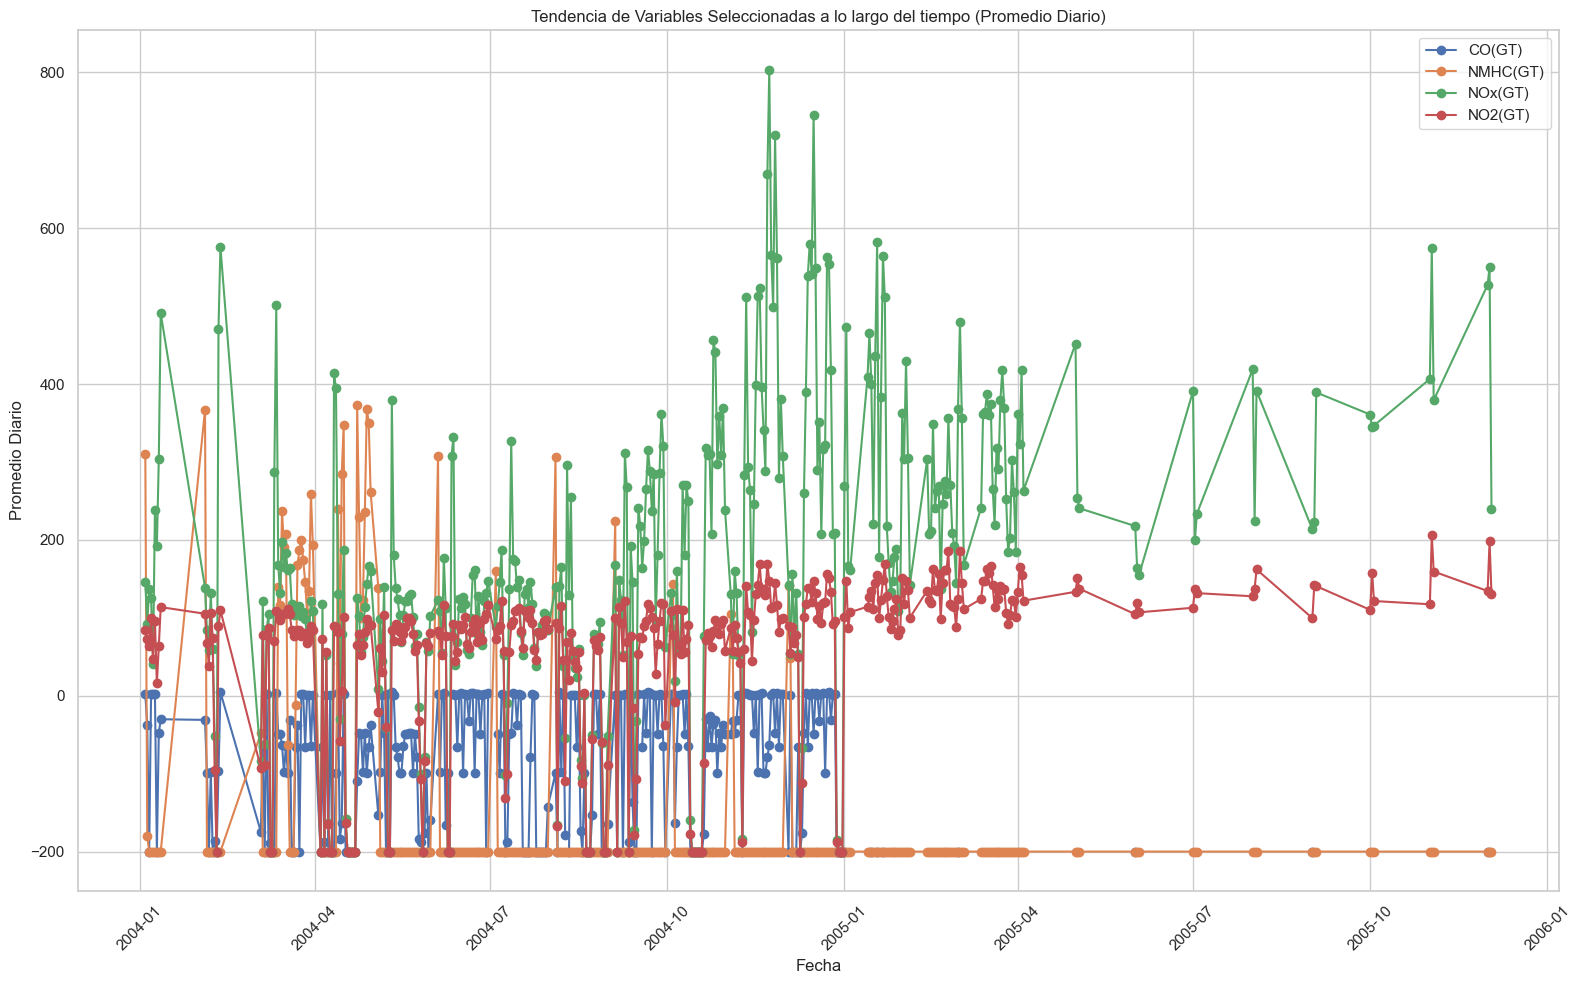

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Verificar las columnas disponibles en daily_average
print("Columnas disponibles en daily_average:")
print(daily_average.columns)

# Seleccionar las variables de interés
variables_of_interest = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']

# Filtrar 
selected_columns = ['Date'] + variables_of_interest


missing_columns = [col for col in selected_columns if col not in daily_average.columns]

if missing_columns:
    print(f"Las siguientes columnas no están presentes en daily_average: {missing_columns}")
else:
    # Configurar el tamaño de la figura
    plt.figure(figsize=(16, 10))

    # Gráficos de línea para las variables de interés en daily_average
    for column in variables_of_interest:
        plt.plot(daily_average['Date'], daily_average[column], label=column, marker='o')

 
    plt.title('Tendencia de Variables Seleccionadas a lo largo del tiempo (Promedio Diario)')
    plt.xlabel('Fecha')
    plt.ylabel('Promedio Diario')
    plt.xticks(rotation=45)

  
    plt.legend()


    plt.tight_layout()
    plt.show()

**💡 se deja esta serie de visualizaciones solo para ampliar información**

La columna Time contiene valores nulos. Se omitirá en la visualización.
La columna CO(GT) contiene valores nulos. Se omitirá en la visualización.


C:\Users\villa\AppData\Local\Temp\ipykernel_23512\1128266234.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_average = AirData.groupby(AirData['Date'].dt.date).mean().reset_index()


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

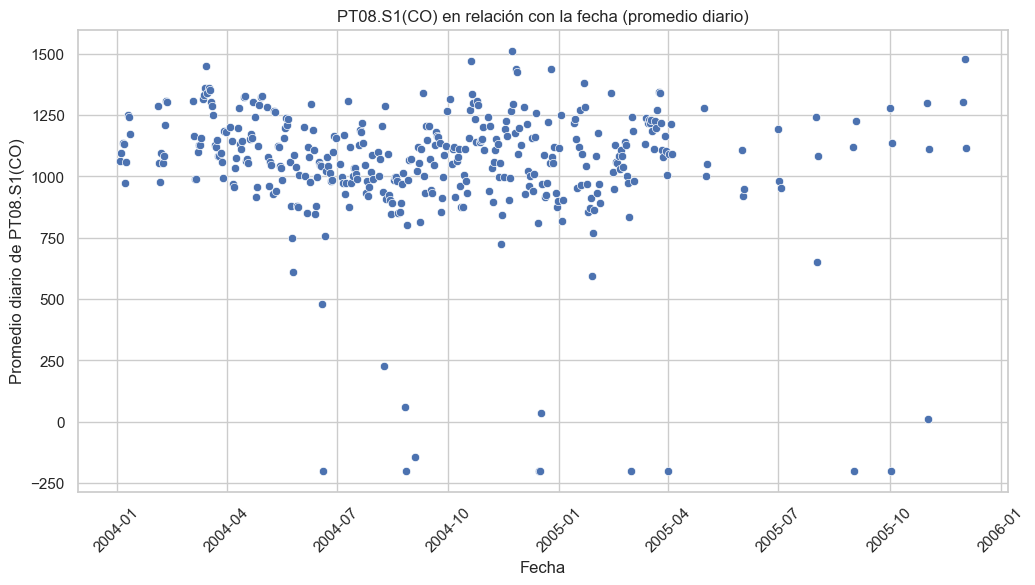

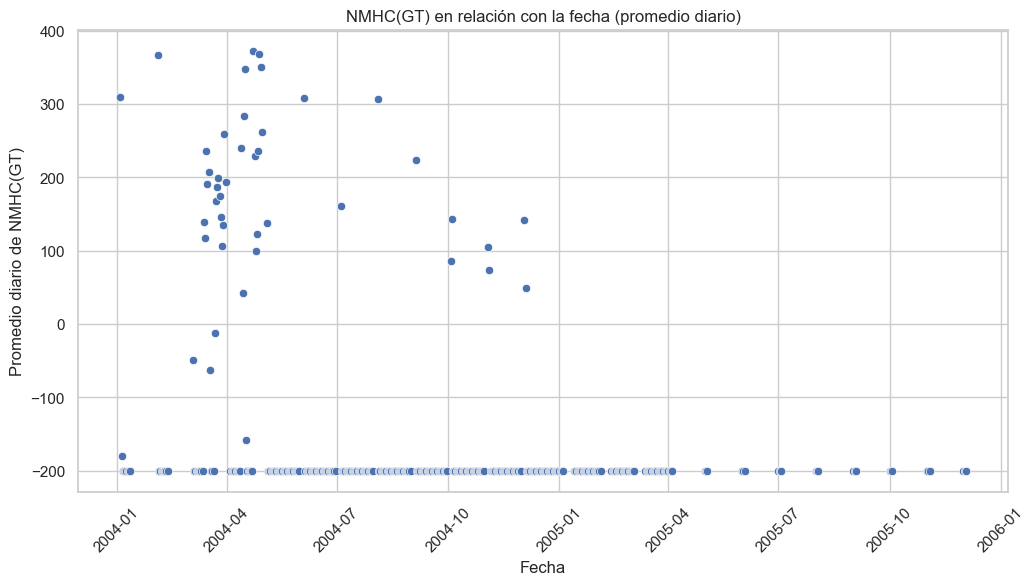

La columna C6H6(GT) contiene valores nulos. Se omitirá en la visualización.


<Figure size 1200x600 with 0 Axes>

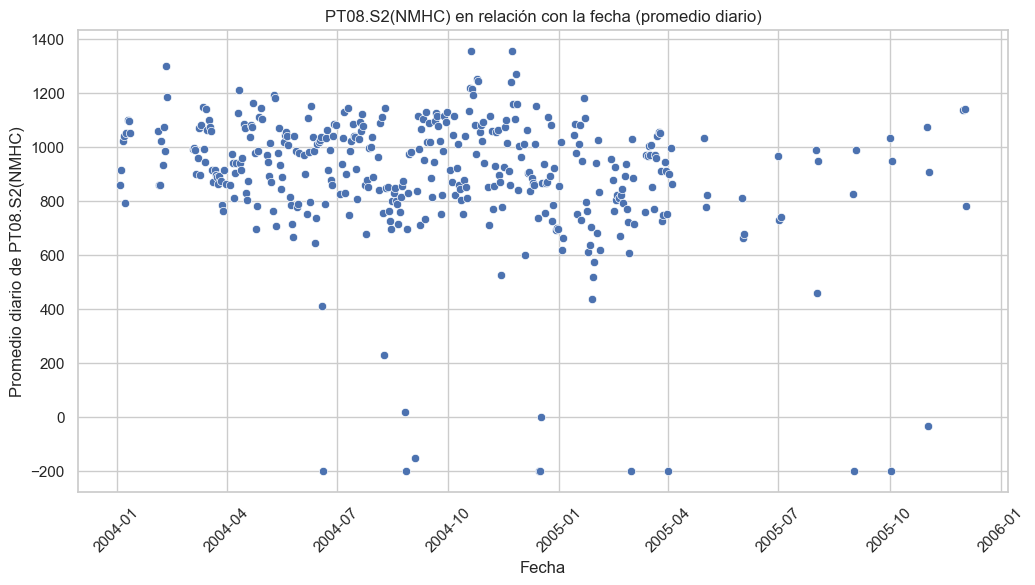

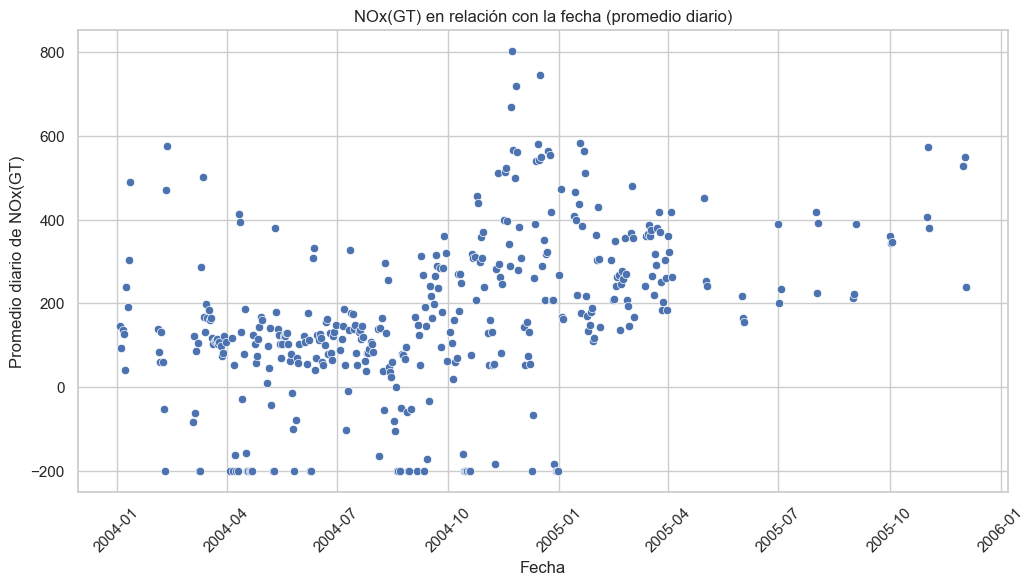

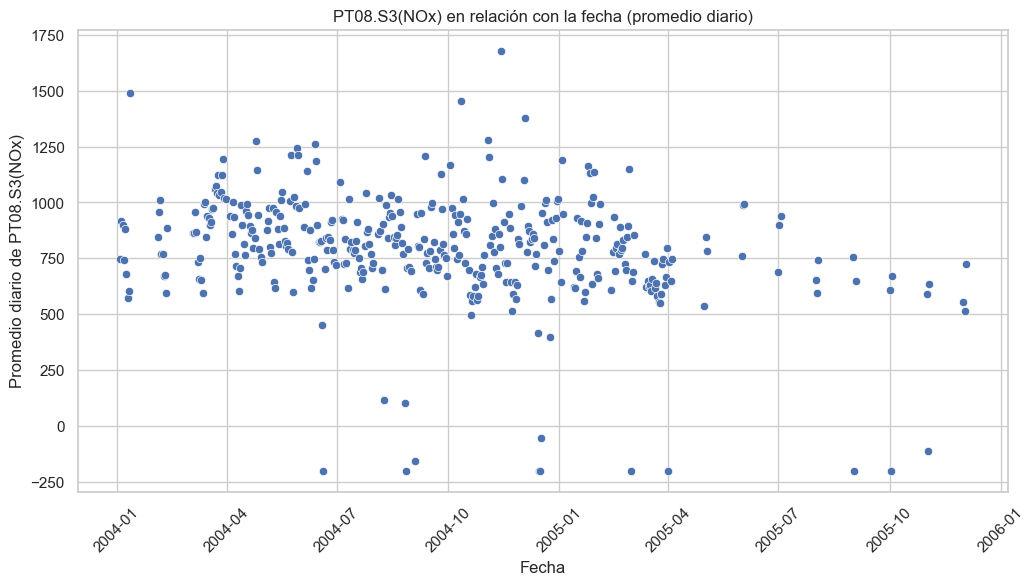

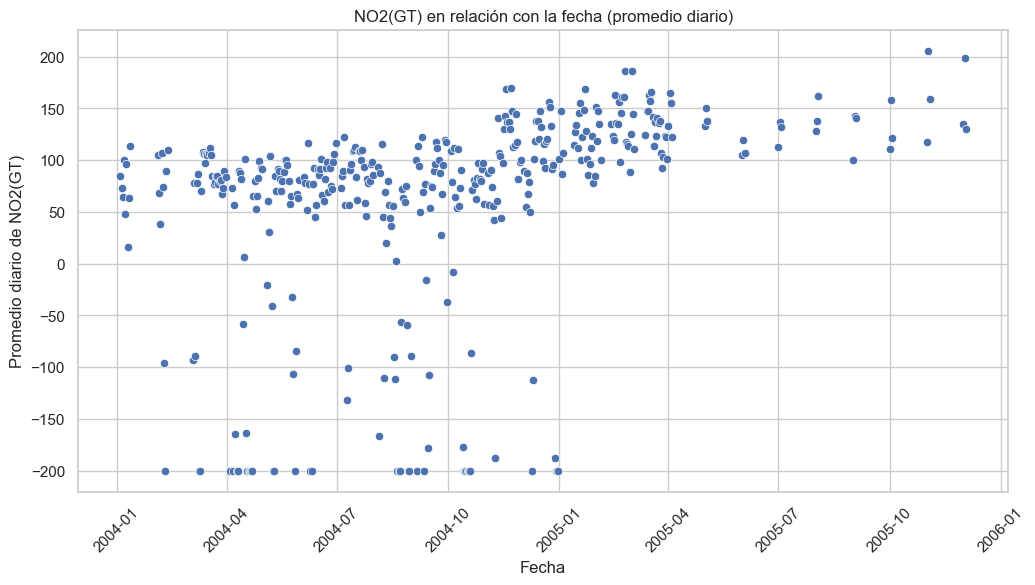

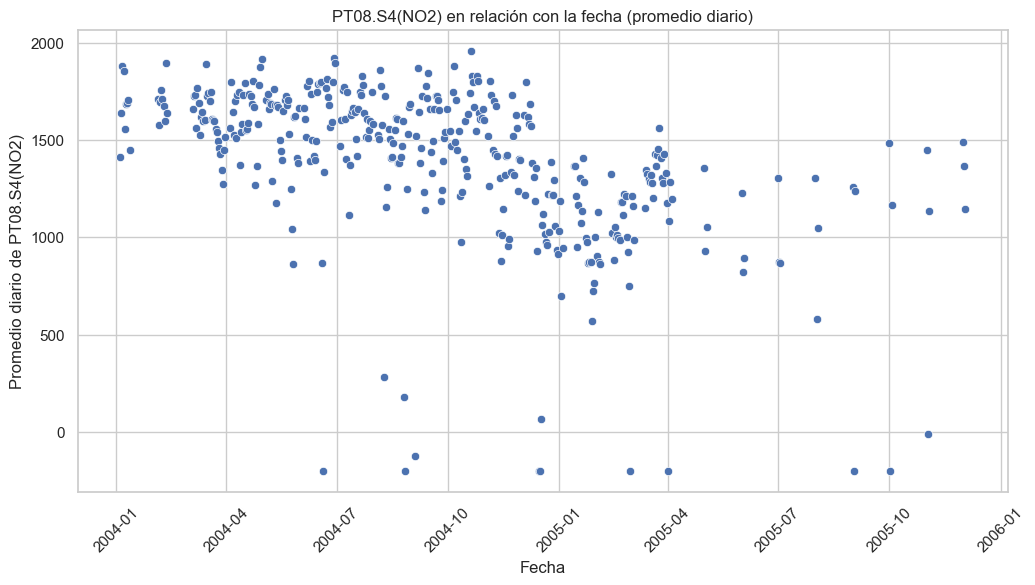

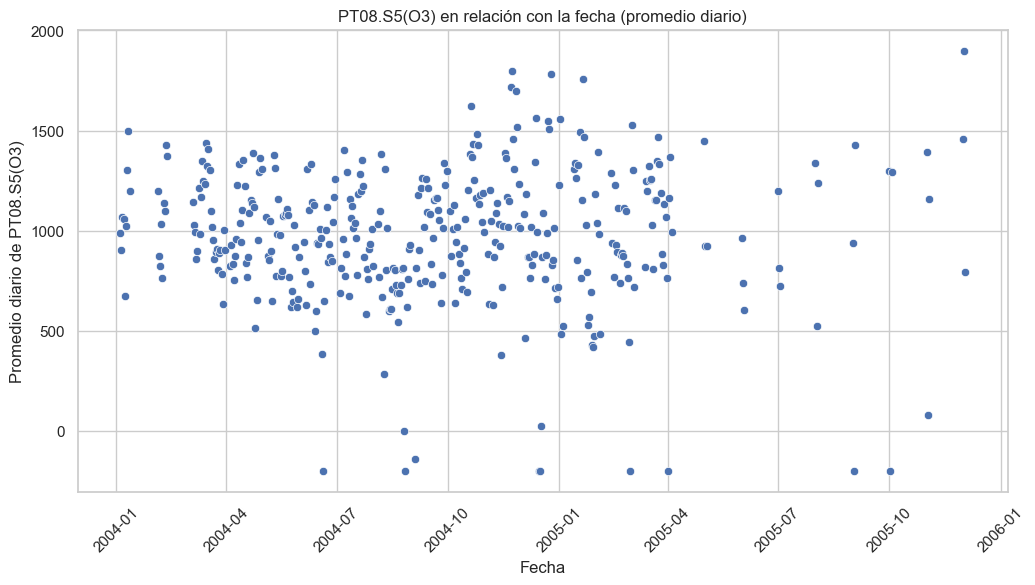

La columna T contiene valores nulos. Se omitirá en la visualización.
La columna RH contiene valores nulos. Se omitirá en la visualización.
La columna AH contiene valores nulos. Se omitirá en la visualización.
La columna Unnamed: 15 contiene valores nulos. Se omitirá en la visualización.
La columna Unnamed: 16 contiene valores nulos. Se omitirá en la visualización.


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [23]:

numeric_columns = AirData.select_dtypes(include='number').columns


daily_average = AirData.groupby(AirData['Date'].dt.date).mean().reset_index()

sns.set(style="whitegrid")


for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Verificar si la columna contiene valores nulos
    if daily_average[column].isnull().any():
        print(f'La columna {column} contiene valores nulos. Se omitirá en la visualización.')
        continue
    
    sns.scatterplot(x='Date', y=column, data=daily_average)
    plt.title(f'{column} en relación con la fecha (promedio diario)')
    plt.xlabel('Fecha')
    plt.ylabel(f'Promedio diario de {column}')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

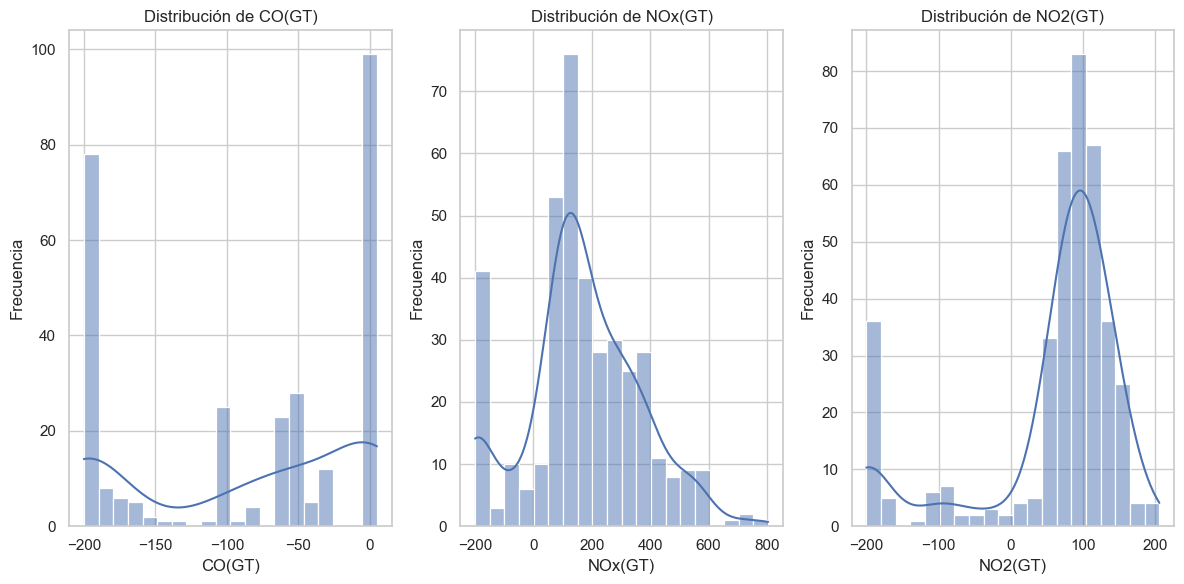

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables de interés
variables_of_interest = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

selected_variables = daily_average[['Date'] + variables_of_interest]

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear subgráficos para cada variable
for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(1, 3, i)
    sns.histplot(selected_variables, x=variable, bins=20, kde=True)
    plt.title(f'Distribución de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

💡💡💡
La distribución de los datos se puede comprender a partir de las gráficas presentadas en el anterior chunck; las cuales, comprueban el análisis precedente que indicaba el comportamiento "disperso", en particular de la variable CO, es decir del monóxido de carbono. En cuanto a los datos de la variable NO2 (dióxido de nitrógeno) encontramos que si bien hay un registro uniforme de datos, el comportamiento no presenta una distribución normal, si se le compora con NOx (óxidos de nitrógeno).

**La distribución que se representa en estos datos, ayuda a confirmar la tesis de que la variable dependiente más indicada es NOx**

In [25]:
## ¿cómo son las correlaciones entre las variables del dataset?

Debido al alto número de datos faltantes en el dataset, fue necesario instalar missingno de este modo se pudieron visualizar los datos faltantes. Tal y como se presentan a continuación. 

In [31]:
!pip install missingno

C:\Users\villa\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


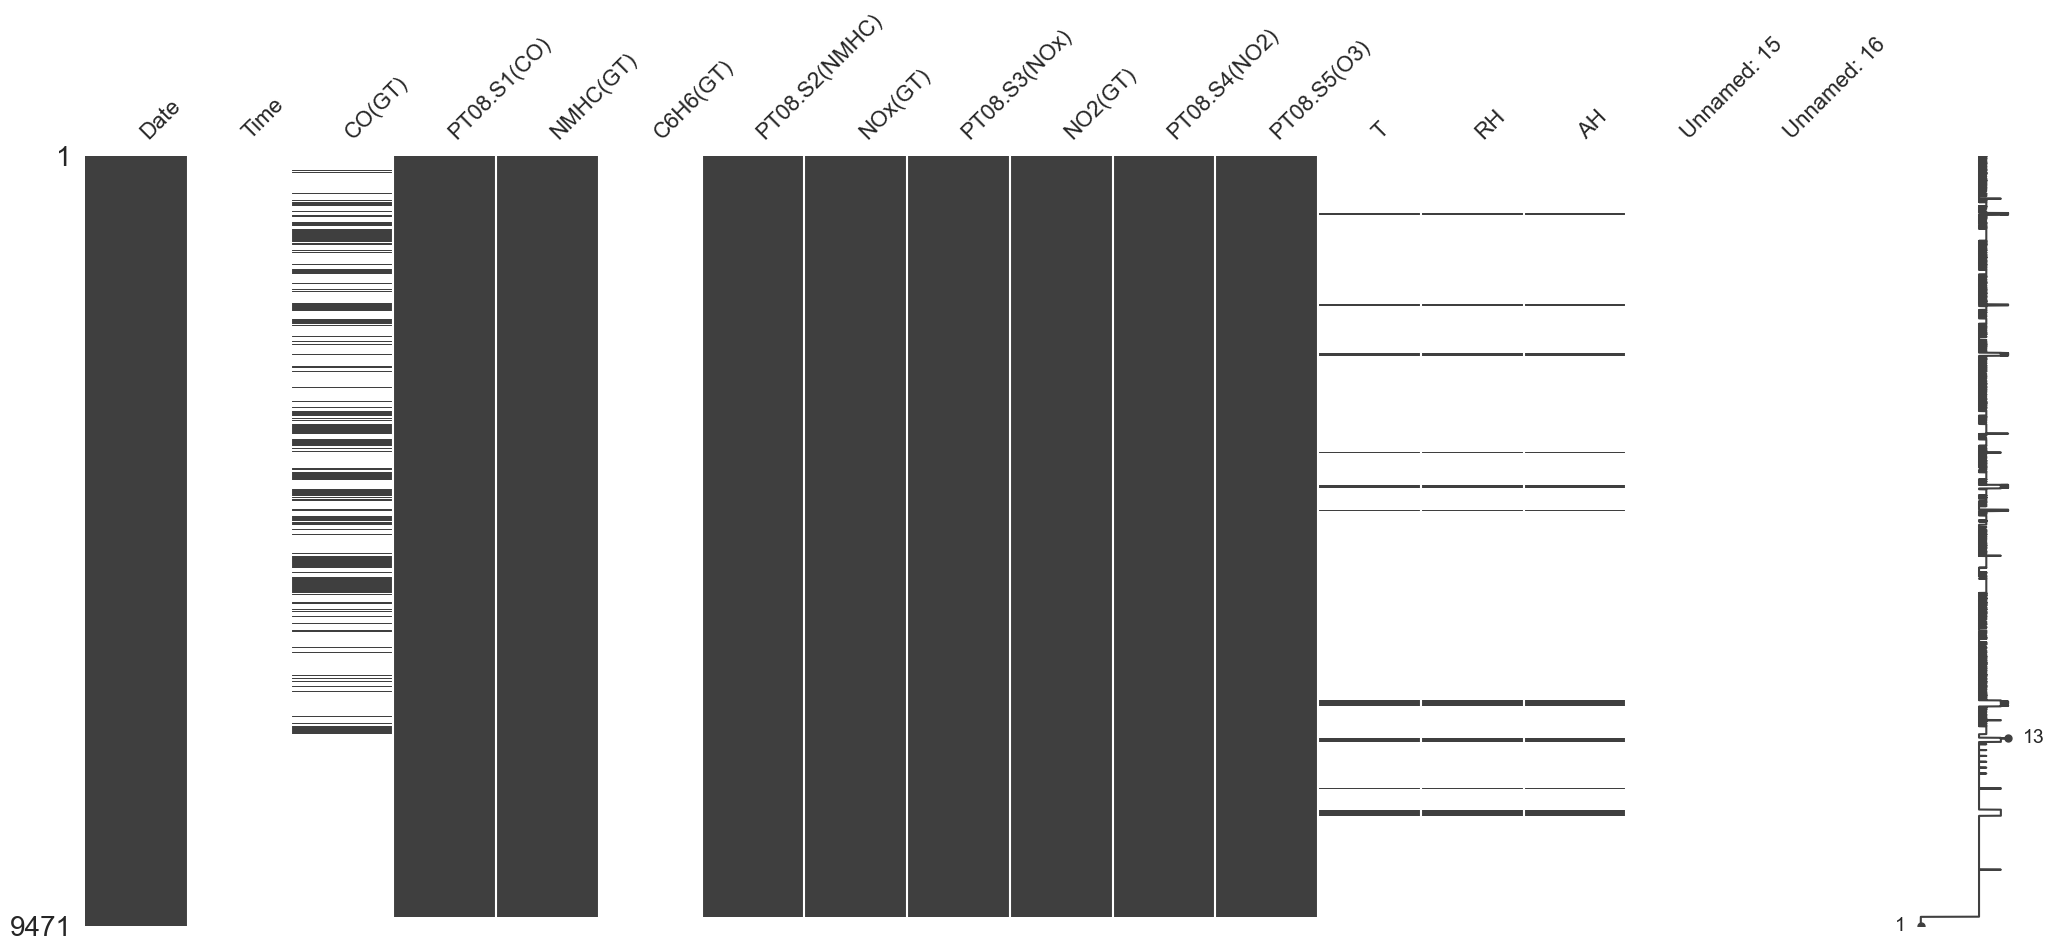

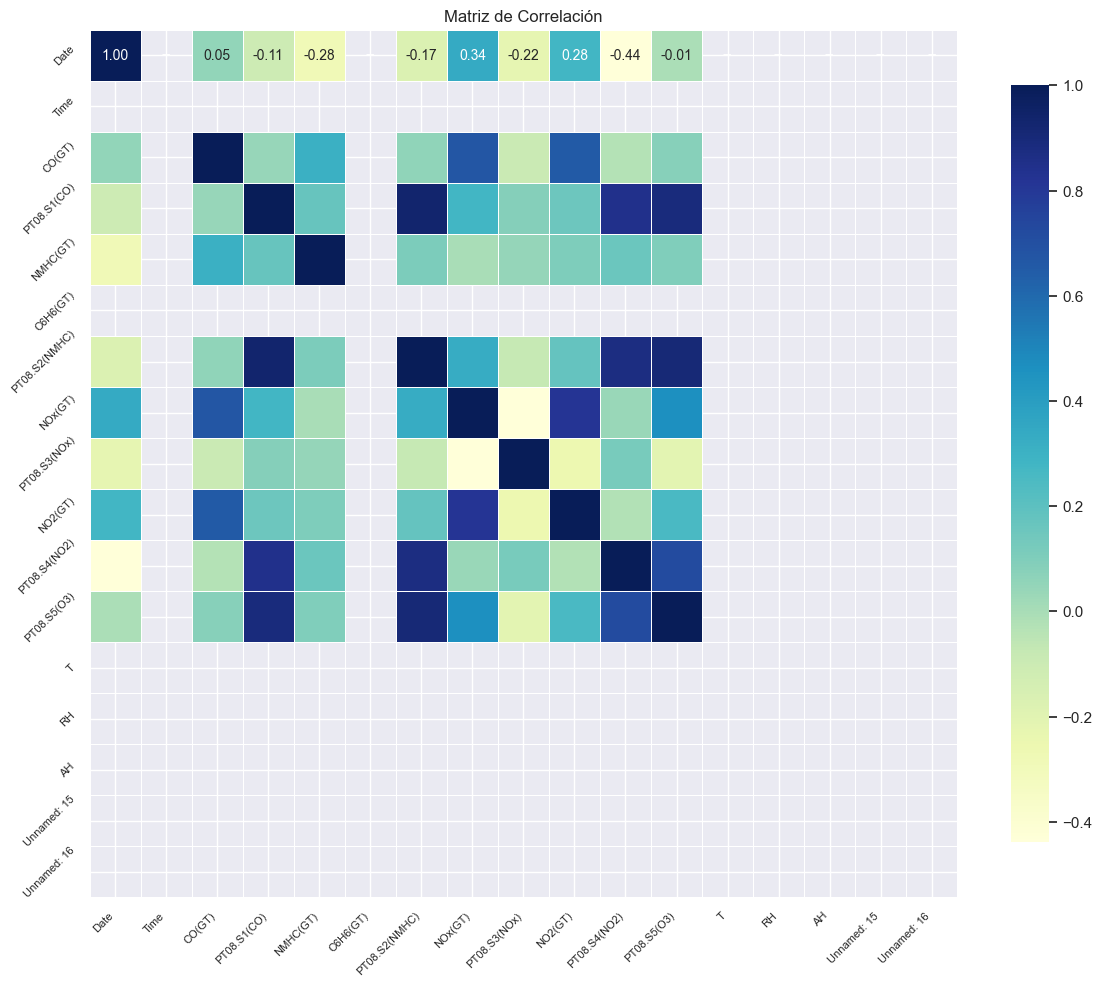

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Convertir la columna 'Date' a tipo datetime 
AirData['Date'] = pd.to_datetime(AirData['Date'])

# Verificar y manejar datos no numéricos, para disminuir el error, sin embargo, debido a los datos faltantes, no se obtienen datos óptimos
AirData = AirData.apply(pd.to_numeric, errors='coerce')


msno.matrix(AirData)

numeric_columns = AirData.select_dtypes(include='number').columns

numeric_data = AirData[numeric_columns]

# Matriz correlación
correlation_matrix = numeric_data.corr()

# Características figura
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)  


sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, square=True,
            annot_kws={"size": 10}, cbar_kws={"shrink": 0.85})  # Ajustar el tamaño de la fuente aquí


plt.xticks(rotation=45, ha='right', fontsize=8)  
plt.yticks(rotation=45, fontsize=8)  
# Configurar el título
plt.title('Matriz de Correlación', fontsize=12)  # Ajustar el tamaño de la fuente aquí

plt.tight_layout()  # Ajustar el diseño de la figura
plt.show()

In [36]:

numeric_columns = AirData.select_dtypes(include='number').columns
numeric_data = AirData[numeric_columns]
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = numeric_data.corr()

print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
                   Date  Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
Date           1.000000   NaN  0.052721    -0.105825 -0.282067       NaN   
Time                NaN   NaN       NaN          NaN       NaN       NaN   
CO(GT)         0.052721   NaN  1.000000     0.040668  0.310791       NaN   
PT08.S1(CO)   -0.105825   NaN  0.040668     1.000000  0.170007       NaN   
NMHC(GT)      -0.282067   NaN  0.310791     0.170007  1.000000       NaN   
C6H6(GT)            NaN   NaN       NaN          NaN       NaN       NaN   
PT08.S2(NMHC) -0.169661   NaN  0.059256     0.933102  0.110104       NaN   
NOx(GT)        0.341394   NaN  0.670521     0.277993 -0.004427       NaN   
PT08.S3(NOx)  -0.222642   NaN -0.092892     0.087019  0.048821       NaN   
NO2(GT)        0.280118   NaN  0.654550     0.154030  0.103307       NaN   
PT08.S4(NO2)  -0.437705   NaN -0.030355     0.845149  0.162680       NaN   
PT08.S5(O3)   -0.009834   NaN  0.084366     0.892434  0.101185   

In [9]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

De acuerdo con los resultados de la matriz de correlación, se puede observar que en relación con la variable objetivo NOx, las que más se correlacionan son CO(GT), PT08S4 y NO2.

In [10]:
## ¿existe alguna variable que no tenga correlación?

**Sí, debido a los datos faltantes las variables C6H6,Time, RH, AH Y Unmaed no establecieron correlación alguna**

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

<span style="color:blue; font-size:16pt; font-weight:bold;">Conclusiones EDA</span>


- Lo primero que se debe concluir es que para lograr un análisis que responda al interrogante planteado en el ejercicio **"calidad del aire para un día"**, era necesario agrupar el registro de los valores por días, este proceso implicó agrupar todos los registros recolectados en un día y promediarlos. Este fue un proceso complejo, además dificultó la lectura en los pasos subsiguientes. Sin embargo, pese a su complejidad, lo consideré necesario para hacer una lectura adecuada de los datos y la proyección de los modelos.

- La segunda conclusión que se puede ofrecer hasta este punto es que nos enfrentamos a una base de datos en la que no hay un comportamiento normal en todas sus variables. Puntualmente la variabel C6H6 (benceno) presenta varias dificultades al tratarla. Como se dejó registrado en la lectura, esta variable no cuenta con una distribución normal de los datos, además que no hay registros frecuentes.

- Se decidió que la variable predictora para establecer la calidad del aire en un día fuera NOx(GT)óxidos de nitrógeno, es una variable que se comporta de forma normal y con unos registros permanentes que permiten proyectar los modelos solicitados.

- El dióxido de carbono NO2 también era una posible variable de, respuesta, pero se descartó al visualizar la distribución normal.

- Se consultó a expertos en el tema sobre las sustancias más peligrosas en el aire, coincidieron en que el dióxido de nitrógeno, el benceno y el monoxido de carbono son los más peligrisos para la salud. Por tanto, podemos prever, desde ya, que la calidad del aire en esta ciudad, no es muy buena para las personas.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


daily_average['Date'] = pd.to_datetime(daily_average['Date'])
daily_average['DateNumeric'] = (daily_average['Date'] - daily_average['Date'].min()).dt.days
X = daily_average[['DateNumeric']]
y = daily_average['NOx(GT)']  

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# separar datos de entrenamiento y test

In [62]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

**se realizó en el anterior paso para poder ejecutar el código, de lo contrario, generaba error**

In [63]:

X = daily_average[['DateNumeric']]
y = daily_average['NOx(GT)']

In [ ]:
# entrena el modelo con los datos de entrenamiento

In [49]:
# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)
model


LinearRegression()

In [ ]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [51]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_train_scaled)
predictions;

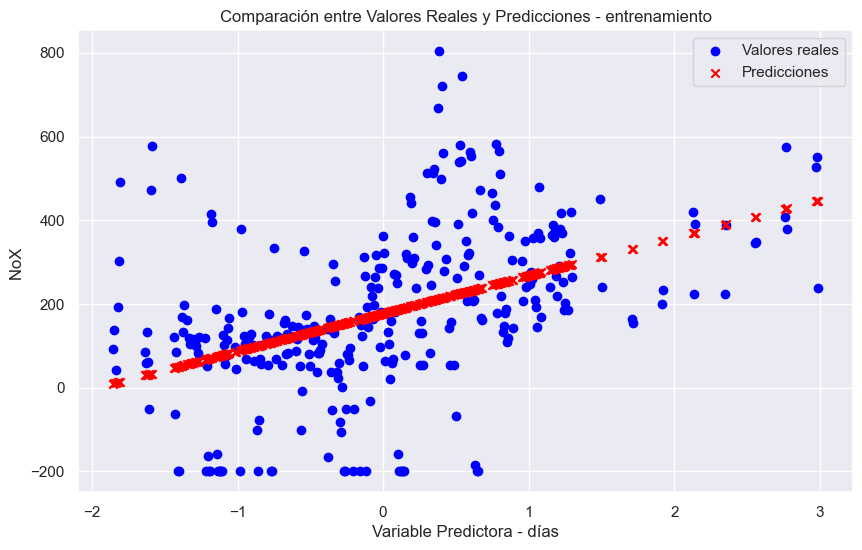

In [56]:
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de entrenamiento escalado
predictions = model.predict(X_train_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled, y_train, label='Valores reales', color='blue')
plt.scatter(X_train_scaled, predictions, label='Predicciones', color='red', marker='x')
plt.title('Comparación entre Valores Reales y Predicciones - entrenamiento')
plt.xlabel('Variable Predictora - días')
plt.ylabel('NoX ')
plt.legend()
plt.show()

Es notorio el esfuero del modelo por disminuir el sesgo de los valores a medida en que se desplaza sobre la variabke tiempo. Pese a que se seleccionó la variable con un comportamiento "normal", en relación con los demás datos, el modelo ha aprendido que el aumento en el dióxido de carbono, la variable objetivo, será progresiva. 

Se puede concluir que el entrenamiento ha sido eficiente para el modelo.

In [ ]:
# realiza las predicciones para el conjunto de datos de test

In [53]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)
predictions

array([ 28.39872038,  61.59937636,  55.96152912, 250.78047273,
       330.96318907, 349.75601321,  71.6222159 , 255.7918925 ,
       203.1719849 , 111.71357407, 215.70053433, 138.64995534,
        86.65647522, 173.10346627, 264.5618771 , 220.7119541 ,
        97.30574223,  32.15728521, 118.60427626, 193.14914536,
         8.97946876, 168.0920465 , 312.17036492, 158.06920696,
        87.90933016, 124.86855097, 119.8571312 , 220.08552663,
       202.54555743, 267.69401445, 388.59451644,  65.98436866,
       187.51129811,  82.27148292, 226.97622881,  87.28290269,
       292.75111331,  50.95010935, 108.58143672, 148.04636742,
       130.50639822, 256.41831997,  95.42645982, 285.86041113,
       243.88977054,  59.72009395,  72.24864338, 210.68911456,
       135.51781799, 114.84571143, 113.59285649, 234.49335847,
        72.87507085,  49.07082693,  54.70867418,  90.41504005,
       139.90281029, 245.76905296,  84.7771928 ,  54.0822467 ,
       157.44277949, 281.47541883, 192.52271789, 221.96

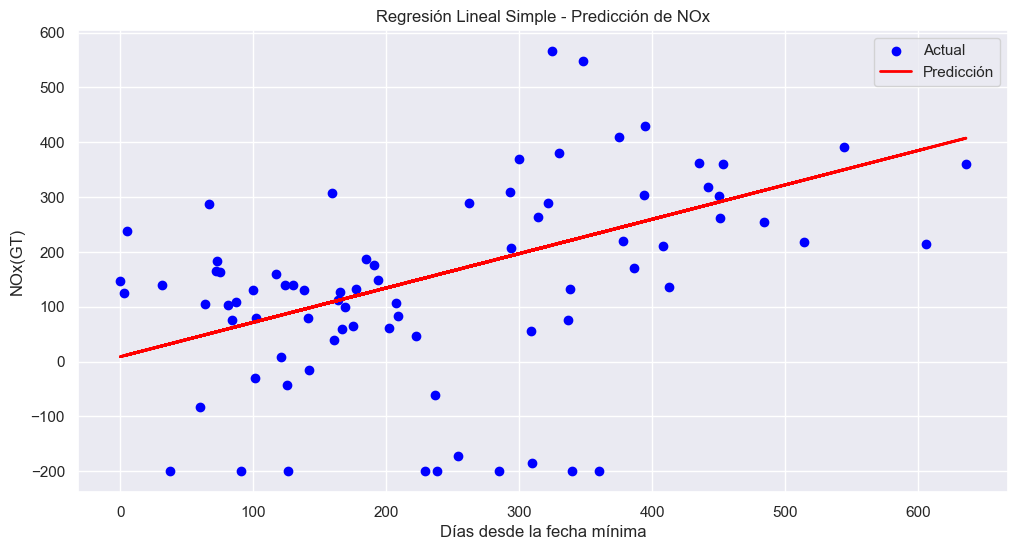

In [54]:
# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test['DateNumeric'], y_test, label='Actual', color='blue')
plt.plot(X_test['DateNumeric'], predictions, label='Predicción', color='red', linewidth=2)
plt.title('Regresión Lineal Simple - Predicción de NOx')
plt.xlabel('Días desde la fecha mínima')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()

In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Calcular métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Mostrar métricas
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 134.36
MSE: 34011.71
RMSE: 184.42


In [ ]:
# ¿Qué error tiene el modelo? Explícalo.

🚫 🚫 🚫

Al hacer los cálculos de las medidas para evaluar el modelo, se evidencia que no tiene el rendimiento esperado. El promedio absoluto de las diferencis (MAE) y el promedio del cuadrado de las diferencias MSE reflejan resultados muy distantes a los datos reales. El RMSE también indica que el modelo requiere mejoras.

Es posible que este modelo no sea el ideal debido a que estamos frente a un fenomeno multivariable, cuyos datos, además, no se obtienen de forma constante. Es decir, el comportamiento de los datos del pasado, no necesariamente van a predecir con gran exactitud el comportamiento del futuro.

🚫 🚫 🚫

Por tanto, en modelos con datos multivariables, al menos en este caso, no se podría recomendar el uso de modelos lineales simples. 

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

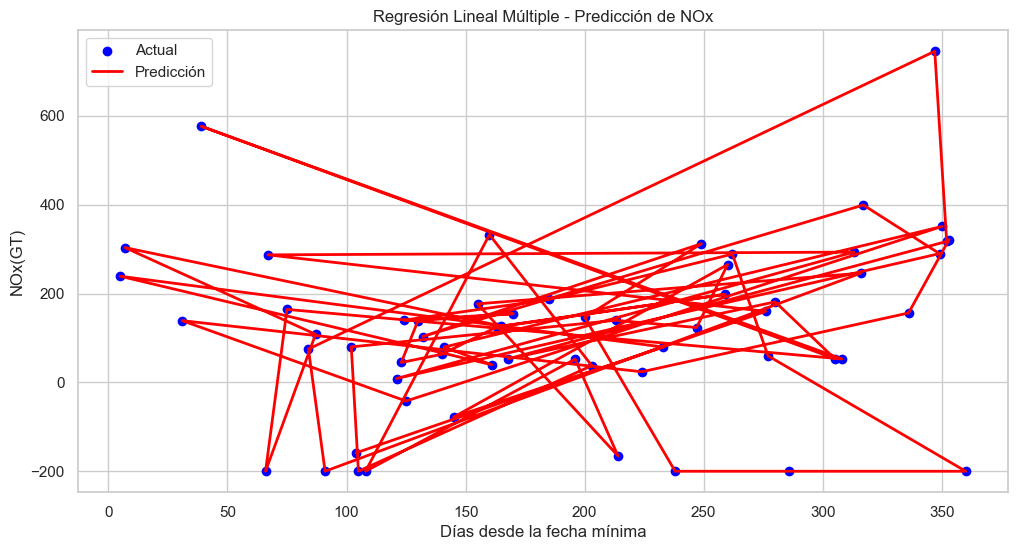

MAE (Múltiple): 0.00
MSE (Múltiple): 0.00
RMSE (Múltiple): 0.00


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


daily_average['Date'] = pd.to_datetime(daily_average['Date'])
daily_average['DateNumeric'] = (daily_average['Date'] - daily_average['Date'].min()).dt.days


X = daily_average[['DateNumeric', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']]
y = daily_average['NOx(GT)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

# Visualizar 
plt.figure(figsize=(12, 6))
plt.scatter(X_test['DateNumeric'], y_test, label='Actual', color='blue')
plt.plot(X_test['DateNumeric'], predictions, label='Predicción', color='red', linewidth=2)
plt.title('Regresión Lineal Múltiple - Predicción de NOx')
plt.xlabel('Días desde la fecha mínima')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()

# Calcular métricas
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f'MAE (Múltiple): {mae:.2f}')
print(f'MSE (Múltiple): {mse:.2f}')
print(f'RMSE (Múltiple): {rmse:.2f}')

<img src="OIP.jpg" alt="sospechoso">

En el modelo de regresión lineal múltiple los datos que se presentan son prácticamente perfectos, es decir, el modelo predijo de forma correcta todas las situaciones; sin embargo, estos resultados no son buenas noticias y nos conducen a una situación típica de sobreajuste en la que el hay sesgo en el modelo al momento de interpretar los datos y no es capaz de asimilar la varianza.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegresson necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

📑👩‍🏫 📑👩‍🏫 📑👩‍🏫 📑👩‍🏫 📑👩‍🏫 📑👩‍🏫 📑👩‍🏫

Indica qué son cada uno de estos hiperparámetros

 Al consultar en la biblioteca de SkLearn se comprendió que:
 
* Criterion es la métrica que permite que la distribución de los datos sea más homogénea. La capacidad que tiene este hiperparámetro permite corregir la distribución de los datos, indica qué tan bueno es hacer homogénea la distribución en cada conjunto. Al hacer uso de Poisson, reduce la variabilidad en cada una de las divisiones de los datos que se hacen

* Splitter: es un hiperparámetro, que como el anterior, ayuda a optimizar la división de los datos; sin embargo, esta es una división aleatoria.

* max_depth: indica la profunidad máxima del árbol

* min_samples_split: se elige el número de muestras para cada rama del árbol antes de decidir continuar dividiendola

* min_samples_leaf: parámetro para indicar cuántos elementos están al final de cada rama


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

🌲🌲🌲🌲🌲 🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲

Optimiza la toma de decisiones del árbol, añadiendo condiciones para la toma de decisión o para continuar con la profunidad. Las restricciones de esta decisión están condicionadas a la utilidad o al coste que puede representar para el árbol.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [85]:
y_train_pos = y_train - y_train.min() + 1


tree_model = DecisionTreeRegressor(criterion='poisson', 
                                   max_depth=10, 
                                   min_samples_split=10, 
                                   min_samples_leaf=2, 
                                   max_features=None,
                                   random_state=42)
tree_model.fit(X_train_scaled, y_train_pos)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

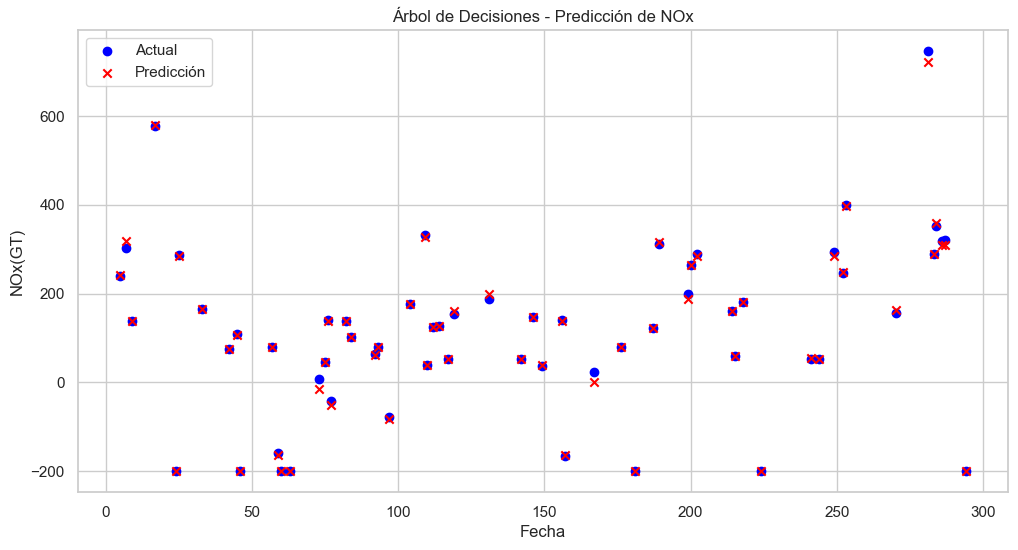

In [88]:
# Visualizar los resultados del árbol de decisiones
plt.figure(figsize=(12, 6))
plt.scatter(X_test.index, y_test, label='Actual', color='blue')
plt.scatter(X_test.index, tree_predictions, label='Predicción', color='red', marker='x')
plt.title('Árbol de Decisiones - Predicción de NOx')
plt.xlabel('Fecha')
plt.ylabel('NOx(GT)')
plt.legend()
plt.show()

Calcula MAE, R2 y RMSLE

In [89]:
from sklearn.metrics import mean_absolute_error, r2_score


mae_tree = mean_absolute_error(y_test, predictions)
r2_tree = r2_score(y_test, predictions)

print(f'MAE (Árbol): {mae_tree:.2f}')
print(f'R2 (Árbol): {r2_tree:.2f}')

MAE (Árbol): 0.00
R2 (Árbol): 1.00


In [91]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import numpy as np

mask = ~np.isnan(y_test) & ~np.isnan(tree_predictions)
y_test_cleaned = y_test[mask]
tree_predictions_cleaned = tree_predictions[mask]


y_test_cleaned[y_test_cleaned < 0] = 0
tree_predictions_cleaned[tree_predictions_cleaned < 0] = 0

mae_tree = mean_absolute_error(y_test_cleaned, tree_predictions_cleaned)
r2_tree = r2_score(y_test_cleaned, tree_predictions_cleaned)

mask_positives = (y_test_cleaned > 0) & (tree_predictions_cleaned > 0)
rmsle_tree = mean_squared_log_error(y_test_cleaned[mask_positives], tree_predictions_cleaned[mask_positives], squared=False)


print(f'MAE (Árbol): {mae_tree:.2f}')
print(f'R2 (Árbol): {r2_tree:.2f}')
print(f'RMSLE (Árbol): {rmsle_tree:.4f}')

MAE (Árbol): 3.14
R2 (Árbol): 1.00
RMSLE (Árbol): 0.3907


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

🌲🚫🌲🚫🌲🚫🌲🚫
El R2, sin lugar a dudas, muestra sobreajuste a los datos de entrenamiento y esto puede afectar el RMSLE. Para mejorar el modelo habrá que hacer ajustes a los hiperparámetros.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

El mejor modelo es el árbol de decisión, como ya se indicó anteriormente, en situaciones en las que nos enfrentamos al análisis de múltiples variables, es mejor entrenar un modelo que se detenga a analizar la probabilidad de que ocurran todas las situaciones posibles y ahí sí, tome una decisión.

💡💡💡💡💡💡💡💡💡💡💡💡💡💡💡

Debido al comportamiento de los datos, también podría intentarse un modelo con Naive Bayes para esta situación. 

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

Se insiste en que el objetivo de estos modelos era el de predecir la calidad del aire para un día. la fuente de datos, en este caso los sensores, proporcionaron información sobre ciertas sustancias contaminantes en registros por horas. Adicional, se presentaron datos de contraste, con promedios de las mismas sustancias. Al observar con detalle la matriz de correlaciones se encontró que los datos obtenidos por el sensor, no presentaban correlación con los promedios de contraste.

Así que estamos frente a un problema de predicción multivariable, sin embargo, la regresión linear múltiple presentó elavados resultados de sobreajuste.

Para ofrecer resultados óptimos se recomienda ajustar los hiperparámetros al modelo de árbol de decisión.

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

 <span style="color:blue; font-size:11pt; font-weight:bold;">Análisis del artículo.</span>
 
https://bv.unir.net:2123/article/10.1007/s10940-022-09557-6 

Cita del artículo:

Pina-Sánchez, J., Buil-Gil, D., Brunton-Smith, I. et al. The Impact of Measurement Error in Regression Models Using Police Recorded Crime Rates. J Quant Criminol 39, 975–1002 (2023). https://bv.unir.net:2133/10.1007/s10940-022-09557-6

**Título**  The Impact of Measurement Error in Regression Models Using Police Recorded Crime Rates
**Autores** Jose Pina-Sánchez, David Buil-Gil, Ian Brunton-Smith & Alexandru Cernat 
**Revista** Journal of Quantitative Criminology
**Año de publicación** 2022

**Objetivo de la investigación**: la investigación cuestiona las técnicas aplicadas al momento de estimar el error en las mediciones de crímenes por parte de la policía, error que tiene afectaciones en el diseño de modelos de regresión lineal que describen y predicen las causas y las consecuencias de los crímenes en una ciudad.

En otras palarbas, el objetivo de este artículo es identificar que no al momento de diseñar el modelo de regresión linear no se hizo un estudio adecuado de la estimación del error y por tanto, el resultado son datos con un alto indicador de sesgo, tal y como se indica en el estudio.

Los investigadores se proponen insertar otras técnicas de medición del error en el modelo de regresión linear para que las evaluaciones del modelo sean más objetivas.

**Técnicas de regresión**: la técnica estudiado es la de regresión linear y para estudiar el error en la estimación del error se pusieron en práctica las siguientes técnicas:

+ Impacto en el coeficiente del crimen: los investigadores observaron un sesgo en los datos
+ Impacto en el coeficiente de percpeción del desorden: también es un error que impacta en el sesgo, pero menos grave que el del impacto del coeficiente
+ Impacto en el error estándar: al introducir esta medición, los estudios concluyen que los modelos de regresión linear, tal y como se han construido a partir de los datos obtenidos por la policía no tienen una buena estiamción de confianza


**Principales resultados**

El estudio conlcuye que es necesario introducir a los modelos de regresión linelar el sesgo de atenuación. 
Este proceso implica hacer transformaciones logarítmicas de los datos obtenidos como variables explicativas
Este, nuevamente, es un caso de análisis multivariable, en el que se debe ser muy cuidadoso con la estimación del error y la correlación de las variables, debido a que un tratamiento poco riguroso de los datos, puede decantar en sesgos del modelo. Por tal razón, se debe introducir la tasa de erro a estos tipos de modelos.


